Apriori Algorithm
Теория
Используемые понятия:

- Множество объектов (itemset): 𝑋⊆𝐼={𝑥1,𝑥2,...,𝑥𝑛}

- Множество идентификаторов транзакций (tidset): 𝑇={𝑡1,𝑡2,...,𝑡𝑚}

- Множество транзакций (transactions): {(𝑡, 𝑋): 𝑡∈𝑇, 𝑋∈𝐼}

Введем дополнительно еще несколько понятий.
Будем рассматривать дерево префиксов (prefix tree), где 2 элемента 𝑋 и 𝑌 соединены, если 𝑋 является прямым подмножеством 𝑌. Таким образом мы можем пронумеровать все подмножества множества 𝐼. Рисунок приведен ниже



Итак, рассмотрим Apriori алгоритм.
Apriori алгоритм использует следующее утверждение: если 𝑋⊆𝑌, то 𝑠𝑢𝑝𝑝(𝑋)≥𝑠𝑢𝑝𝑝(𝑌). Откуда следуют следующие 2 свойства:

если 𝑌 встречается часто, то любое подмножество 𝑋:𝑋⊆𝑌 так же встречается часто

если 𝑋 встречается редко, то любое супермножество 𝑌:𝑌⊇𝑋 так же встречается редко

Apriori алгоритм по-уровнево проходит по префиксному дереву и рассчитывает частоту встречаемости подмножеств 𝑋 в 𝐷. Таким образом, в соответствии с алгоритмом:

исключаются редкие подмножества и все их супермножества

рассчитывается 𝑠𝑢𝑝𝑝(𝑋) для кадого подходящего кандидата 𝑋 размера 𝑘 на уровне 𝑘


В псевдо-код нотации Априори-алгоритм выглядит следующим образом:

ВХОД: Датасет 𝐷, содержащий список транзакций, и 𝜎 - задаваемый пользователем порог 𝑠𝑢𝑝𝑝

ВЫХОД: Список itemsets 𝐹(𝐷,𝜎)

ПОДХОД:

𝐶1 ← [𝑖|𝑖∈𝐽]

𝑘←1

while 𝐶𝑘≠1 do:

#Считаем все support для всех кандидатов

**for all** транзакций (tid, I) ∈𝐷 **do**:

**for all** кандидатов 𝑋∈𝐶𝑘 **do**:

**if** 𝑋⊆𝐼:

𝑋.𝑠𝑢𝑝𝑝𝑜𝑟𝑡++

#Вытаскиваем все частые itemsets:

𝐹𝑘= {X|X.support > 𝜎}

#Генерируем новых кандидатов

**for all** 𝑋,𝑌∈𝐹𝑖,𝑋[𝑖]=𝑌[𝑖] **for** 1≤𝑖≤𝑘−1 **and** 𝑋[𝑘]≤𝑌[𝑘] **do**:

𝐼=𝑋∪ {𝑌|𝑘|}

**if** ∀𝐽⊂𝐼,|𝐽|=𝑘:𝐽∈𝐹𝑘 **then**

𝐶𝑘+1 ←𝐶𝑘+1∪𝐼

𝑘++

Таким образом, Apriori-алгоритм сначала ищет все единичные (содержащие 1 элемент) itemsets, удовлетворяющие заданному пользователем 𝑠𝑢𝑝𝑝, затем составляет из них пары по принципу иерархической монотонности, т.е. если 𝑥1 встречается часто и 𝑥2 встречается часто, то и [𝑥1,𝑥2] встречается часто.

Явным минусом такого подхода является то, что необходимо "просканировать" весь датасет, посчитать все 𝑠𝑢𝑝𝑝 на всех уровнях breadth-first search (поиск в ширину - подробнее тут) Это также может подъесть RAM на больших датасетах, хотя и намного эффективнее брутфорса

Реализация в Python
from sklearn import... эммм... а импортировать-то и нечего:) На данный момент модулей для ALR в sklearn нет. Ну ничего, погуглим или напишем свои, правда?

По сети гуляет целый ряд реализаций, например вот, вот, и даже вот

Мы же на практике придерживаемся алгоритма apyori, написанного Ю Мочиузки (Yu Mochizuki). Полный код приводить не будем, желающие могут посмотреть тут , а вот архитектуру решения и пример использования покажем.

Условно решение Мочизуки можно разделить на 4 части: Структура данных, Внутренние функции, API и Прикладные функции.

Первая часть модуля (Структура данных) работает с изначальным датасетом. Реализуется класс TransactionManager, методы которого объединяют транзакции в матрицу, формируют список правил-кандидатов и считают support для каждого правила. Внутренние функции дополнительно по support'у формируют списки правил и соответственно их ранжируют. API логично позволяет работать напрямую с датасетами, а Прикладные функции позволяют обрабатывать транзакции и выводить результат в читаемый вид. Никакого rocketscience.

Посмотрим, как использовать модуль на реальном (ну, в данном случае - игрушечном) датасете.

-
-
-
-
-
-
Если изначально датасет в бинарном виде не представлен, можно при желании руками его преобразовать (One Hot Encoding и pd.get_dummies вам в помощь).
-
-
-
-
-

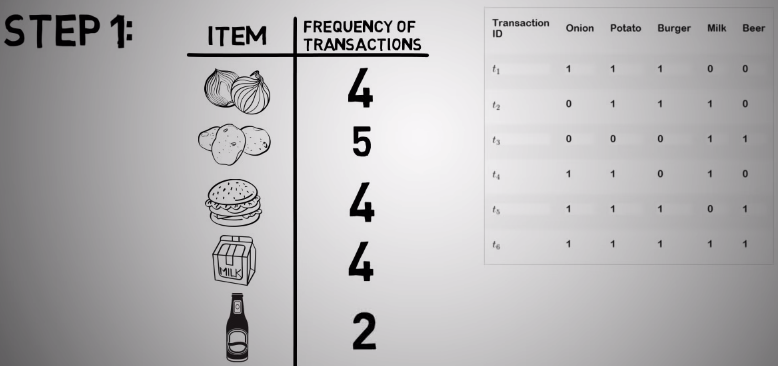

Delete smallest classes
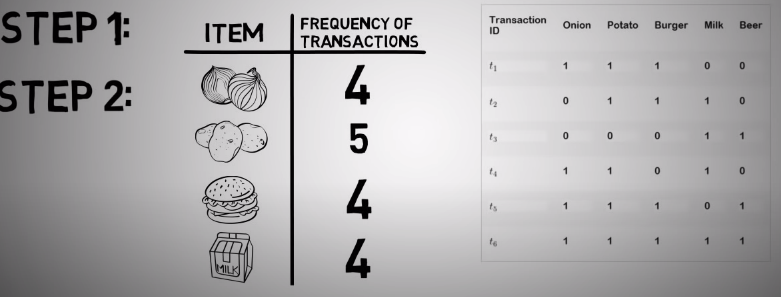

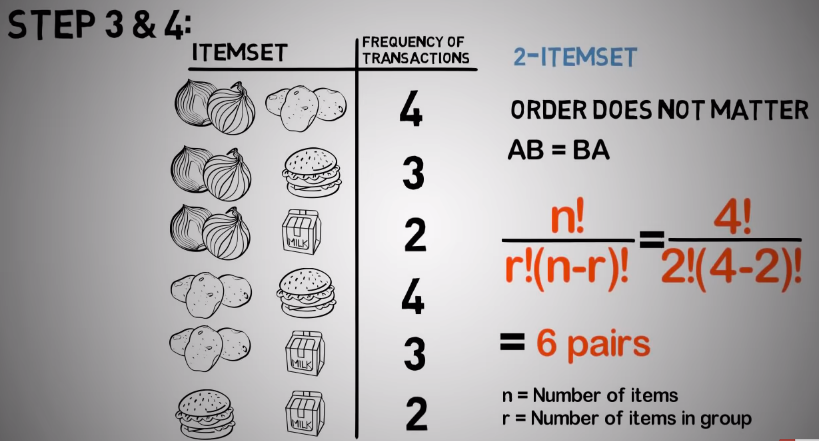

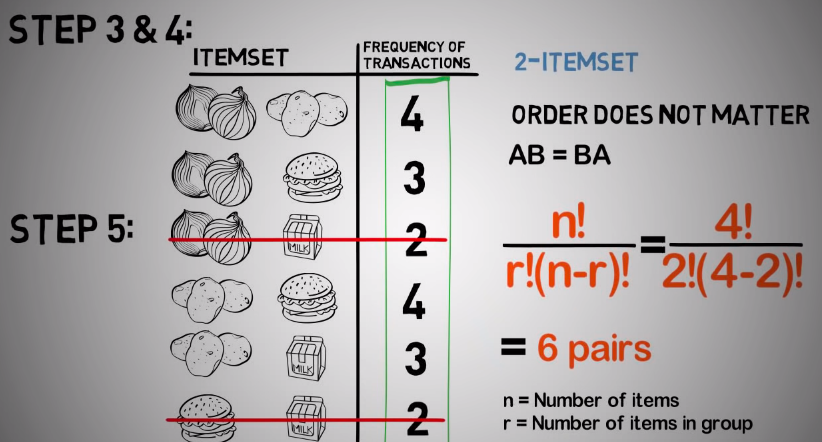

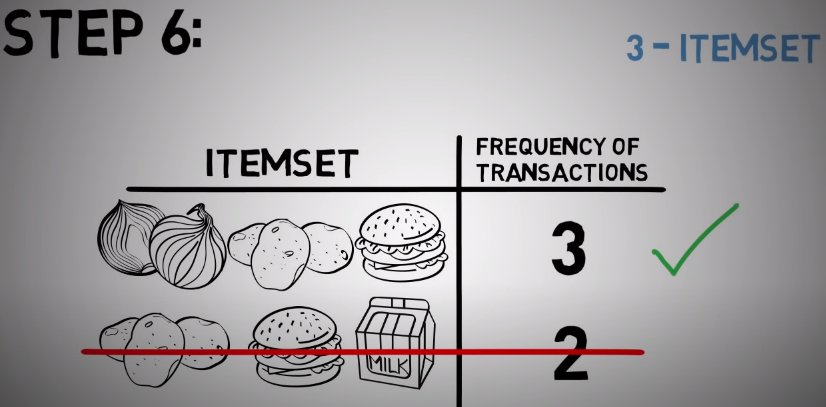

In [84]:
# подгрузим модули
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [88]:
#загружаем apriori
# import apriori
from efficient_apriori import apriori
# from apyori import apriori

In [89]:
import shutil, os 
import json #преобразовывать будем в json, используя встроенные в модуль методы
from IPython.display import display, HTML

In [90]:
try:
    from StringIO import StringIO
except ImportError:
    from io import StringIO

In [91]:
# загрузим данные
dataset = pd.read_csv('GroceryStoreDataSet.csv', header = None)

# посомтрим на датасет
dataset.head()

,0
0,"MILK,BREAD,BISCUIT"
1,"BREAD,MILK,BISCUIT,CORNFLAKES"
2,"BREAD,TEA,BOURNVITA"
3,"JAM,MAGGI,BREAD,MILK"
4,"MAGGI,TEA,BISCUIT"


In [92]:
dataset[['First','Second','Third', 'Last']] = dataset[0].str.split(",",expand=True,)
dataset = dataset.drop([0], axis=1)
dataset.head()

,First,Second,Third,Last
0,MILK,BREAD,BISCUIT,None
1,BREAD,MILK,BISCUIT,CORNFLAKES
2,BREAD,TEA,BOURNVITA,None
3,JAM,MAGGI,BREAD,MILK
4,MAGGI,TEA,BISCUIT,None


In [93]:
dataset.fillna(method = 'ffill',axis = 1, inplace = True)

dataset.head()

,First,Second,Third,Last
0,MILK,BREAD,BISCUIT,BISCUIT
1,BREAD,MILK,BISCUIT,CORNFLAKES
2,BREAD,TEA,BOURNVITA,BOURNVITA
3,JAM,MAGGI,BREAD,MILK
4,MAGGI,TEA,BISCUIT,BISCUIT


In [94]:
#создаим из них матрицу
transactions = []
for i in range(0, len(dataset)): 
    transactions.append([str(dataset.values[i,j]) for j in range(0, 3)])

In [95]:
%%time
# и обучимся правилам. Обратите внимание, что пороговые значения мы вибираем сами в зависимости от того, /
# насколкьо "сильные" правила мы хотим получить
# min_support -- минимальный support для правил (dtype = float).
# min_confidence -- минимальное значение confidence для правил (dtype = float)
# min_lift -- минимальный lift (dtype = float)
# max_length -- максимальная длина itemset (вспоминаем про k-itemset)  (dtype = integer)


itemsets, rules = apriori(transactions, min_support = 0.003, min_confidence = 0.2)

# result = list(apriori.apriori(transactions, min_support = 0.003, min_confidence = 0.2, min_lift = 4, min_length = 2))

# result = list(apriori(transactions))

Wall time: 2 ms


In [96]:
# Print out every rule with 2 items on the left hand side,
# 1 item on the right hand side, sorted by lift
rules_rhs = filter(lambda rule: len(rule.lhs) == 2 and len(rule.rhs) == 1, rules)
for rule in sorted(rules_rhs, key=lambda rule: rule.lift):
  print(rule)  # Prints the rule and its confidence, support, lift, ...

{MAGGI, TEA} -> {BREAD} (conf: 0.333, supp: 0.050, lift: 0.513, conv: 0.525)
{COCK, COFFEE} -> {BREAD} (conf: 0.333, supp: 0.050, lift: 0.513, conv: 0.525)
{BOURNVITA, SUGER} -> {BREAD} (conf: 0.500, supp: 0.050, lift: 0.769, conv: 0.700)
{COFFEE, SUGER} -> {BREAD} (conf: 0.500, supp: 0.100, lift: 0.769, conv: 0.700)
{BREAD, SUGER} -> {BISCUIT} (conf: 0.250, supp: 0.050, lift: 0.833, conv: 0.933)
{MAGGI, TEA} -> {BISCUIT} (conf: 0.333, supp: 0.050, lift: 1.111, conv: 1.050)
{BREAD, MAGGI} -> {TEA} (conf: 0.333, supp: 0.050, lift: 1.111, conv: 1.050)
{BISCUIT, BREAD} -> {SUGER} (conf: 0.333, supp: 0.050, lift: 1.111, conv: 1.050)
{BOURNVITA, BREAD} -> {SUGER} (conf: 0.333, supp: 0.050, lift: 1.111, conv: 1.050)
{COFFEE, SUGER} -> {BOURNVITA} (conf: 0.250, supp: 0.050, lift: 1.250, conv: 1.067)
{BOURNVITA, SUGER} -> {COFFEE} (conf: 0.500, supp: 0.050, lift: 1.250, conv: 1.200)
{BREAD, SUGER} -> {BOURNVITA} (conf: 0.250, supp: 0.050, lift: 1.250, conv: 1.067)
{BREAD, SUGER} -> {COFFEE} (c

##### Support (поддержка)

Первое понятие  в ARL - support:


$supp(X) = \frac{\{t\in T;\ X \in t\}}{|T|}$

, где X - itemset, содержащий в себе i-items, а T - количество транзакций. Т.е. в общем виде это показатель "частотности" данного itemset во всех анализируемых транзакциях. Но это касается только X. Нам же интересен скорее вариант, когда у нас в одном itemset встречаются x1 и x2 (например).
Ну тут тоже все просто. Пусть x1 = {Пиво}, а x2 = {Подгузники}, значит нам нужно посчитать, во скольких транзакциях втречается эта парочка. 

$supp(x_1\cup x_2) = \frac{\sigma(x_1 \cup x_2)}{|T|}$, где $\sigma $ - количество транзакций, содержащих $x_1$ и $x_2$

##### Confidence (достоверность)

Следующее ключевое понятие - confidence. Это показатель того, как часто наше правило срабатывает для всего датасета. 

$conf(x_1\cup x_2) = \frac{supp(x_1 \cup x_2)}{supp(x_1)}$

Приведем пример: мы хотим посчитать confidence для правила "кто покупает пиво, тот покупает и подгузники".

Для этого сначала посчитаем, какой support у правила "покупает пиво", потом посчитаем support у правила "покупает пиво и подгузники", и просто поделим одно на другое. Т.е. мы посчитаем в скольких случаях (транзакциях) срабатывает правило "купил пиво $supp(X)$, купил подгузники и пиво $supp(X \cup Y)$"
Ничего не напоминает? Байес смотрит на все это несколько недоуменно и с презрением:)

<img src="img/thomas-bayes.png">

##### Lift (поддержка)

Следующее понятие в нашем списке - lift. Грубо говоря, lift - это отношение "зависимости" items к их "независимости". Lift показывает, насколько items зависят друг от друга. Это очевидно из формулы:

$lift(x_1\cup x_2) = \frac{supp(x_1 \cup x_2)}{supp(x_1) \times supp(x_2)}$

Например, мы хотим понять зависимость покупки пива и покупки подгузников. Для этого считаем support правила "купил пиво и подгузники" и делим его на произведение правил "купил пиво" и "купил подгузники". В случае, если lift = 1, мы говорим, что items независимы и правил совместной покупки тут нет. Если же lift > 1, то величина, на которую lift, собственно, больше этой самой единицы, и покажет нам "силу" правила. Чем больше единицы, тем круче.

##### Conviction (убедительность)

В общем виде Conviction - это "частотность ошибок" нашего правила. Т.е., например, как часто покупали пиво без подгузников и наоборот.

$conv(x_1\cup x_2) = \frac{1 - supp(x_2)}{1 - conf(x_1 \cup x_2)}$

Чем результат по формуле выше ближе к 1, тем лучше. Например, если conviction покупки пива и подгузников вместе равен 1.2, это значит, что правило "купил пиво и подгузники" было бы в 1.2 раза (на 20%) более верным, чем если бы совпадение этих items в одной транзакции было бы чисто случайным. Немного неинтуитивное понятие, но оно и используестя н етак часто, как предыдущие три. 

Существует ряд часто используемых классических алгоритмов, позволяющих находить правила в itemsets согласно перечисленным выше понятиям - Наивный или брутфорс-алгоритм, Apriori- алгоритм, ECLAT-алгоритм, FP-growth алгоритм и другие.